<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`
   3. sort lists of dated files even if they are sorted correctly by default on your machine

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Michael Murdock**

<img style="float: left;" src="colored-bar.png"/>

---

# Raster Data in Python: Quantify Ecological Change Using Remote Sensing Derived Data

If you haven't already, review the following chapters in the Intermediate Earth Data Science
online textbook:

* https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/what-is-lidar-data/
* https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/colorado-floods-2013/ 
* https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/

## Boulder, CO Pre- and Post-flood Data
### Data Selection

For this assignment, you will examine disturbances to the vegetation and terrain caused by the Boulder 2013 flood event. Digital Terrain Models (DTMs) and Digital Surface Models (DSMs) derived from Laser Imaging, Detection, and Ranging (LIDAR) measurements are available *upon request* from the National Ecological Observation Network (NEON) for before and after the flood event. For this assignment, the data are available from the earthpy colorado-flood data subset.

In your opinion, are these NEON DTM/DSM data FAIR (Findable, Accessible, Inter-operable, and Reusable)? Why or why not? Answer in the cell below.

I would say so. Workflows can easily be created to contribute to greater discovery and reproducibility within the community. All required NEON data can be retrieved from EarthyPy and directories can be set to minimize work and confusion for users looking to run the notebook. The relevant data also has documentation for accessing and identifying what's contained within.

### Data Description
Using the [NEON report describing these data](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.709.6127&rep=rep1&type=pdf), answer the following questions in the cell below:
  1. What dates were the before and after flood data collected?
  2. What processing if any was done on the raw LiDAR data? What tools did the authors use?
  3. Write an assertion-evidence style takeaway for one of the figures included in the report (you can reference the figure number rather than displaying the image in your notebook).

- pre-flood data was collected on June 26th and 27th, 2013, and post-flood data was collected on October 8th, 2013
- Georeferencing on Lidar data was done to combine trajectory, angles, and calibration information to generate a three-dimensional coordinate 'point-cloud,' and output as LAS 1.3 files. Refined processing was also applied to minimize the sum of squares of the distance between points in the target line to planes in the reference line, maximizing the compatibility of adjacent flight lines. This was applied to both pre-and post-flood data simultaneously for highlighting differences in topography before and after the flood.
- The September 2013 Boulder Flood caused significant physical changes in stream channels (Figure 7).

### Data Citation
In the cell below, cite the pre- and post-flood LiDAR data from NEON.

- NEON (National Ecological Observatory Network). Data Products NEON.DP3.30015.001, NEON.DP3.30025.001 https://data.neonscience.org (accessed October 6, 2022)

In [1]:
# Imports for autograding - do not edit!
import numpy as np

<img style="float: left;" src="colored-bar.png"/>

##  Locate and load data into Python

### Import required packages

To begin, in the cell below add any python imports needed to complete this assignment.
Do not add imports that are not used in this notebook!

In [2]:
import os

import matplotlib.pyplot as plt

import geopandas as gpd
import earthpy as et
import xarray as xr
import rioxarray as rxr

In [3]:
# Test package imports - DO NOT MODIFY THIS CELL!

try:
    gpd_lib = gpd
    print("\u2705 Score! geopandas has been imported as a gpd!")
except NameError:
    print("\u274C geopandas has not been imported as a gpd, please make "
          "sure to import is properly.")

try:
    rxr_lib = rxr
    print("\u2705 Score! rioxarray has been imported as a rxr!")
except NameError:
    print("\u274C rioxarray has not been imported as a rxr, please make "
          "sure to import is properly.")

try:
    xr_lib = xr
    print("\u2705 Score! xarray has been imported as a xr!")
except NameError:
    print("\u274C xarray has not been imported as a xr, please make "
          "sure to import is properly.")

✅ Score! geopandas has been imported as a gpd!
✅ Score! rioxarray has been imported as a rxr!
✅ Score! xarray has been imported as a xr!


### Set Working Directory and Download Data

In the cell below complete the following task:

1. First, use **EarthPy** to download the `colorado-flood` data:
    
   ```python
   et.data.get_data("colorado-flood")
   ```

2. **Use a conditional statement** to:
    * Check if the `~` >`earth-analytics` > `data` > `colorado-flood` directory exists
    * Create the path if it does not exist.
    * **Incorporate variable(s) to reduce repetition in your code.**
    * Use the `os` package to ensure that the paths you create will run successfully on any operating system.
    
3. Change the working directory to the `colorado-flood` directory.

In [4]:
# use earthpy to get colorado flood data
flood_data = et.data.get_data("colorado-flood")

flood_path = os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data',
    'colorado-flood')

# if the colorado flood path exists, set our working directory
if os.path.exists(flood_path):
    os.chdir(flood_path)

# else create path and print message
else:
    flood_data
    print('Path created.')

In [5]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is earth-analytics/data/colorado-flood

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

wd_points = 0

if student_wd_parts[-3:] == ['earth-analytics', 'data', 'colorado-flood']:
    print("\u2705 Great - it looks like your working directory is set "
          "correctly to ~/earth-analytics/data/colorado-flood")
    wd_points += 2
else:
    print("\u274C Oops, the autograder will not run unless your working "
          "directory is set to earth-analytics/data/colorado-flood")

print("\n \u27A1 You received {} out of 2 points for setting your "
      "working directory."
      .format(wd_points))

wd_points

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data/colorado-flood

 ➡ You received 2 out of 2 points for setting your working directory.


2

## Import data to Python

### Define the paths to data files

All the files you will need are in the `spatial` > `boulder-leehill-rd`

For this analysis, you will need:
  * pre-flood DTM GeoTIFF (.tif) raster
  * pre-flood DSM GeoTIFF (.tif) raster
  * post-flood DTM GeoTIFF (.tif) raster
  * post-flood DSM GeoTIFF (.tif) raster
  * Area of interest (AOI) shapefile
  
In the cell below, **use a bash command** to list all the files in `spatial` > `boulder-leehill-rd`.

In [6]:
%%bash

find spatial/boulder-leehill-rd

spatial/boulder-leehill-rd
spatial/boulder-leehill-rd/clip-extent.qpj
spatial/boulder-leehill-rd/clip-extent.prj
spatial/boulder-leehill-rd/README.md
spatial/boulder-leehill-rd/clip-extent.dbf
spatial/boulder-leehill-rd/post-flood
spatial/boulder-leehill-rd/post-flood/lidar
spatial/boulder-leehill-rd/post-flood/lidar/post_DTM_hill.tif
spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif
spatial/boulder-leehill-rd/post-flood/lidar/post_DSM.tif
spatial/boulder-leehill-rd/post-flood/lidar/post_DSM_hill.tif
spatial/boulder-leehill-rd/pre-flood
spatial/boulder-leehill-rd/pre-flood/camera
spatial/boulder-leehill-rd/pre-flood/camera/preCamera_Comp.tfw
spatial/boulder-leehill-rd/pre-flood/camera/preCamera_Comp.tif
spatial/boulder-leehill-rd/pre-flood/lidar
spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif
spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM_repoject2.tif
spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif
spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM_hill.tif
sp

Based on the result, copy the paths of the *5 files* you need into the cell below.


- spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif
- spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif
- spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif
- spatial/boulder-leehill-rd/post-flood/lidar/post_DSM.tif
- spatial/boulder-leehill-rd/clip-extent.shp

Next, in the cell below, define the four raster paths as Python variables with **descriptive names** so that your code will work on **any operating system**. Return all 4 of your file paths (in any order).

To avoid copy pasta, make sure to define a **variable** for the `spatial` > `boulder-leehill-rd` directory.

BONUS (5 points extra credit): Store your raster file paths in a dictionary. You will still need to return your file names as 5 separate items. (You can return a list or other iterator of your rasters, and the tests will run))

In [7]:
# I can't tell if the above is saying return 4 or 5 files, so
# I've added the shape file as the 5th incase thats part of the bonus

# set path
leehill_dir = os.path.join('spatial', 'boulder-leehill-rd')

# empty dict to store combinations
lidar_pths = {}
# iterate through timing list
for timing in ['pre', 'post']:
    # iterate through model types
    for model in ['DTM', 'DSM']:
        # set path
        path = (os.path.join(leehill_dir, f'{timing}-flood',
                             'lidar', f'{timing}_{model}.tif'))
        # store path in dict
        lidar_pths[f'{timing}_{model}'] = path

# add shape file path to dict
lidar_pths['shape'] = os.path.join(leehill_dir, 'clip-extent.shp')

# return all file names other than shape file
list(lidar_pths.values())[:-1]

['spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif',
 'spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif',
 'spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif',
 'spatial/boulder-leehill-rd/post-flood/lidar/post_DSM.tif']

In [8]:
# DO NOT MODIFY THIS CELL

student_paths = _
paths_pts = 0

if len(student_paths)==4:
    print("\u2705 Great job! You returned all 4 paths!")
    paths_pts += 2
else:
    print("\u274C Oops, did you return all the paths?.")

paths_exist = [os.path.exists(pth) for pth in student_paths]
if all(paths_exist):
    print("\u2705 Great job! All your paths exist!")
    paths_pts += 2
else:
    print("\u274C Oops, your paths do not all exist.")
    
print("\n \u27A1 You received {} out of 4 points for setting your "
      "paths."
      .format(paths_pts))
    
paths_pts

✅ Great job! You returned all 4 paths!
✅ Great job! All your paths exist!

 ➡ You received 4 out of 4 points for setting your paths.


4

### Open the clipping extent shapefile

Define a path to the `clip-extent.shp` file, and then open it using `geopandas`

Call your `GeoDataFrame` at the end of the cell for testing

In [9]:
# read in AOI shape file as Geopandas df
shape_gdf = gpd.read_file(lidar_pths['shape'])

shape_gdf

,id,geometry
0,1,"POLYGON ((472510.465 4436000.000, 476009.764 4..."


In [10]:
student_gdf = _
gdf_pts = 0

if isinstance(student_gdf, gpd.GeoDataFrame):
    print("\u2705 Great job! You returned a GeoDataFrame!")
    gdf_pts += 2
else:
    print("\u274C Oops, did you call your GeoDataFrame?")
    
print("\n \u27A1 You received {} out of 2 points for opening your "
      "clip extent shapefile."
      .format(gdf_pts))

gdf_pts

✅ Great job! You returned a GeoDataFrame!

 ➡ You received 2 out of 2 points for opening your clip extent shapefile.


2

### Open the data with rioxarray and clip it

#### Write a function to open your raster files

Below is a [**numpy-style** docstring](https://numpydoc.readthedocs.io/en/latest/format.html#docstring-standard) for a function that you will write. You don't need to import the numpy library to write a numpy-style docstring; that descriptions means that the docstring follows the same style guide that developers for numpy use:

  ```python
  """
  Open a GeoTIFF file and clip to the area of interest (AOI).
  
  Uses the rioxarray package to open a raster dataset. Performs
  standard preprocessing tasks: 
    1. Masks NA values
    2. Eliminates dimensions of length one
    3. Clips to data using a supplied shapefile.
    
  Parameters
  ----------
  tif_path: str
      Path to the GeoTIFF raster dataset to be opened.
  shp_path: str
      Path to the shapefile of the AOI.
  
  Returns
  -------
  xarray.DataArray
      The preprocessed raster dataset.
  """
  ```
  
Notice that the docstring does not extend past 72 characters, as specified by PEP 8.

In the cell below, write a function that matches this docstring. It should:
  1. Open a raster dataset with NA values masked
  2. Remove any extra dimensions (e.g. dimensions of length 1)
  3. Clip to the area of interest defined by the `clip-extent.shp` file, making sure that the Coordinate Reference Systems (CRSs) match.
  4. Have this same docstring! Copy the docstring to the second line of your function, making sure that it is indented. You should see the whole docstring when you run `help(your_function_name)`
  
HINT: **Write the function one line at a time**, making sure to test along the way by evaluating the function on a single dataset. It may be helpful  to write the code to perform these steps for one of the datasets, and then convert that into a function.

**Type the *name of your function* on the last line of the cell for testing. Do not include parentheses - this test is checking for a docstring, not the results of the function.**

In [11]:
def process_raster_dataset(tif_path, shp_path):
    """
      Open a GeoTIFF file and clip to the area of interest (AOI).

      Uses the rioxarray package to open a raster dataset. Performs
      standard preprocessing tasks: 
        1. Masks NA values
        2. Eliminates dimensions of length one
        3. Clips to data using a supplied shapefile.

      Parameters
      ----------
      tif_path: str
          Path to the GeoTIFF raster dataset to be opened.
      shp_path: str
          Path to the shapefile of the AOI.

      Returns
      -------
      xarray.DataArray
          The preprocessed raster dataset.
    """

    # open AIO shapefile
    shp_gdf = gpd.read_file(shp_path)

    clip_raster_da = (
        # open GeoTiff
        rxr.open_rasterio(tif_path, masked=True)
        # remove extra dimension
        .squeeze()
        # clip to aoi
        .rio.clip(shp_gdf.geometry, shp_gdf.crs))

    return clip_raster_da


process_raster_dataset

<function __main__.process_raster_dataset(tif_path, shp_path)>

In [12]:
student_function = _
function_pts = 0

student_docstring = student_function.__doc__
if not student_docstring is None:
    print("\u2705 Great job! You submitted a function with a docstring ^!")
    function_pts += 1
    
    if len(student_docstring.split('\n')) > 3:
        print("\u2705 Great job! Your function has a multi-line docstring!")
        function_pts += 1
    else:
        print("\u274C Oops, that docstring is too short.")
        
else:
    print("\u274C Oops, that isn't a function with a docstring.")
    
print("\n \u27A1 You received {} out of 2 points for writing a function."
      .format(function_pts))

function_pts

✅ Great job! You submitted a function with a docstring ^!
✅ Great job! Your function has a multi-line docstring!

 ➡ You received 2 out of 2 points for writing a function.


2

#### Open all the raster files using your function

Use your function to open all four raster datasets. There are multiple ways to do this - I expect most of you two choose one of the following:
  1. You can save each opened dataset as its own **descriptive** variable. We only have four datasets here, so this is a fine way to do this even if other methods are more DRY.
  2. If you completed the earlier bonus challenge you can write a loop to open all the datasets in your dictionary by using the `.items()` method. Remember that `.items()` returns two items (key AND value) for each iteration.
  
No matter which method you choose, you should return all four datasets by separating them with commas or by returning `dictionary.values()`.

In [13]:
# empty dict to store processed data
lidar_das = {}

# iterate through dict items
for key, path in lidar_pths.items():
    # set key in new dict and its processed data as value
    lidar_das[key] = process_raster_dataset(path, lidar_pths['shape'])

    # skipping shape file in lidar_pths
    if len(lidar_das) == len(lidar_pths)-1:
        break

lidar_das.values()

dict_values([<xarray.DataArray (y: 2000, x: 3490)>
array([[1982.7899, 1982.5   , 1982.19  , ..., 1695.63  , 1695.4199,
        1695.4299],
       [1983.2799, 1983.14  , 1982.7999, ..., 1695.6   , 1695.5399,
        1695.36  ],
       [1984.0499, 1983.97  , 1983.64  , ..., 1695.38  , 1695.44  ,
        1695.37  ],
       ...,
       [1957.32  , 1957.72  , 1958.13  , ..., 1681.45  , 1681.39  ,
        1681.25  ],
       [1957.6499, 1958.2   , 1958.58  , ..., 1681.72  , 1681.57  ,
        1681.5599],
       [1957.97  , 1958.5199, 1959.08  , ..., 1681.89  , 1681.8099,
        1681.74  ]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 4.725e+05 4.725e+05 4.725e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0, <xarray.DataArray (y: 2000, x: 3490)>
array([[1986.51  , 1989.5499, 1989.59  , ..., 1695.63  , 1695.59  ,
        169

In [14]:
student_das = _
das_pts = 0

if (len(student_das)==4 
      and all([isinstance(da, xr.DataArray) for da in student_das])):
    print("\u2705 Great job! Your returned 4 DataArrays!")
    das_pts += 2
else:
    print("\u274C Oops, make sure your returned all 4 of your DataArrays.")
    
if all([len(da.x)==3490 and len(da.y)==2000 for da in student_das]):
    print("\u2705 Great job! Your DataArrays are the right size!")
    das_pts += 4
else:
    print("\u274C Oops, make sure you clipped your DataArrays.")
    
if sum([da.sum().values for da in student_das])==51005370368:
    print("\u2705 Great job! Your DataArrays have the right values!")
    das_pts += 4
else:
    print("\u274C Oops, your DataArrays do not have the right values.")
    
print("\n \u27A1 You received {} out of 10 points for opening your "
      "four raster datasets."
      .format(das_pts))

das_pts

✅ Great job! Your returned 4 DataArrays!
✅ Great job! Your DataArrays are the right size!
✅ Great job! Your DataArrays have the right values!

 ➡ You received 10 out of 10 points for opening your four raster datasets.


10

## Calculate the change in terrain and vegetation at the time of the flood

With your four raster datasets (pre- and post-flood DSMs and DTMs), you can computer changes to both terrain and vegetation. Bear in mind the following definitions:
  * **Digital Terrain Model (DTM)** - the elevation of the ground relative to the datum
  * **Digital Terrain Model of Difference (DoD)** - Erosion and deposition.

      > DoD = DTM<sub>post</sub> - DTM<sub>pre</sub>
      
  * **Digital Surface Model (DSM)** - the elevation of vegetation relative to the datum
  * **Canopy Height Model (CHM)** - the height of vegetation relative to the ground
  
      > CHM = DSM - DTM
      
  * **Differenced Canopy Height Model (dCHM)** - Vegetation growth or destruction over a period of time. Note that these values should be negative for decreased vegetation and positive for increased.
  
      > dCHM = CHM<sub>post</sub> - CHM<sub>pre</sub>

### Compute a DTM of Difference (DoD)
In the cell below, compute the change in DTM post-flood so that deposition is positive and erosion is negative. At the end of the cell, call your new DataArray object.

In [15]:
# compute erosion and deposition
dod_arr = lidar_das['post_DTM'] - lidar_das['pre_DTM']

dod_arr

<xarray.DataArray (y: 2000, x: 3490)>
array([[-0.13000488,  0.        , -0.07995605, ..., -0.05004883,
         0.10998535,  0.09997559],
       [-0.13989258, -0.17004395, -0.09997559, ...,  0.05993652,
        -0.01989746,  0.20996094],
       [-0.15002441, -0.23999023, -0.22009277, ...,  0.14001465,
        -0.01000977,  0.11999512],
       ...,
       [ 0.26000977,  0.33996582,  0.13989258, ...,  1.420044  ,
         1.4199219 ,  1.5599365 ],
       [ 0.11999512,  0.08996582,  0.0300293 , ...,  0.67993164,
         0.97998047,  1.0700684 ],
       [-0.08996582, -0.03991699, -0.06994629, ...,  0.29992676,
         0.4699707 ,  0.60998535]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 4.725e+05 4.725e+05 4.725e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

In [16]:
# DO NOT MODIFY THIS CELL

student_dod = _
dod_pts = 0

# Test DoD
if isinstance(student_dod, xr.DataArray):
    print("\u2705 Great job! Your DoD is stored in a DataArray!")
    dod_pts += 1
else:
    print("\u274C Oops, your DoD is not stored in a DataArray.")

if int(student_dod.min()) == -10:
    print("\u2705 The minimum value in your DoD is correct!")
    dod_pts += 2
else:
    print("\u274C The minimum value in your DoD is incorrect.")

if int(student_dod.max()) == 15:
    print("\u2705 The maximum value in your DoD is correct!")
    dod_pts += 2
else:
    print("\u274C The maximum value in your DoD is incorrect.")
    
print("\n \u27A1 You received {} out of 5 points for computing a DoD."
      .format(dod_pts))

dod_pts

✅ Great job! Your DoD is stored in a DataArray!
✅ The minimum value in your DoD is correct!
✅ The maximum value in your DoD is correct!

 ➡ You received 5 out of 5 points for computing a DoD.


5

In [17]:
# what is meant to be in this cell?

# compute erosion and deposition
dod_arr = lidar_das['post_DTM'] - lidar_das['pre_DTM']

# compute vegetation change
chm_post = lidar_das['post_DSM'] - lidar_das['post_DTM']
chm_pre = lidar_das['pre_DSM'] - lidar_das['pre_DTM']
dchm_arr = chm_post - chm_pre

dchm_arr

<xarray.DataArray (y: 2000, x: 3490)>
array([[ 0.        ,  1.3900146 ,  2.3099365 , ...,  0.        ,
        -0.17004395,  0.02001953],
       [ 1.3198242 ,  5.340088  ,  7.7999268 , ...,  0.        ,
        -0.09008789, -0.23999023],
       [-4.0599365 , -3.079956  , -2.9399414 , ...,  0.        ,
         0.        , -0.07995605],
       ...,
       [-0.3400879 , -0.8898926 , -0.31982422, ...,  0.        ,
         0.        ,  0.        ],
       [-1.4599609 , -0.82995605, -1.9899902 , ...,  0.        ,
         0.        ,  0.        ],
       [-2.5300293 , -4.25      ,  1.079956  , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 4.725e+05 4.725e+05 4.725e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

### Compute a differenced Canopy Height Model (dCHM)
In the following cell, compute:
  1. A pre-flood CHM
  2. A post-flood CHM
  3. A dCHM 

At the end of the cell, call the DataArray containing the dCHM you created. You do not need to call the pre- and post-flood CHMs.

In [18]:
# compute vegetation change
chm_post = lidar_das['post_DSM'] - lidar_das['post_DTM']
chm_pre = lidar_das['pre_DSM'] - lidar_das['pre_DTM']
dchm_arr = chm_post - chm_pre

dchm_arr

<xarray.DataArray (y: 2000, x: 3490)>
array([[ 0.        ,  1.3900146 ,  2.3099365 , ...,  0.        ,
        -0.17004395,  0.02001953],
       [ 1.3198242 ,  5.340088  ,  7.7999268 , ...,  0.        ,
        -0.09008789, -0.23999023],
       [-4.0599365 , -3.079956  , -2.9399414 , ...,  0.        ,
         0.        , -0.07995605],
       ...,
       [-0.3400879 , -0.8898926 , -0.31982422, ...,  0.        ,
         0.        ,  0.        ],
       [-1.4599609 , -0.82995605, -1.9899902 , ...,  0.        ,
         0.        ,  0.        ],
       [-2.5300293 , -4.25      ,  1.079956  , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 4.725e+05 4.725e+05 4.725e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

In [19]:
# DO NOT MODIFY THIS CELL
# Visible tests for your array

student_dchm = _
dchm_pts = 0
    
# Test dCHM
if isinstance(student_dchm, xr.DataArray):
    print("\u2705 Great job! Your dCHM is stored in a DataArray!")
    dchm_pts += 2
else:
    print("\u274C Oops, your dCHM is not stored in a DataArray.")

if int(student_dchm.min()) == -23:
    print("\u2705 The minimum value in your dCHM is correct!")
    dchm_pts += 4
else:
    print("\u274C The minimum value in your dCHM is incorrect.")

if int(student_dchm.max()) == 24:
    print("\u2705 The maximum value in your dCHM is correct!")
    dchm_pts += 4
else:
    print("\u274C The maximum value in your dCHM is incorrect.")
    
print("\n \u27A1 You received {} out of 10 points for computing a dCHM."
      .format(dchm_pts))

dchm_pts

✅ Great job! Your dCHM is stored in a DataArray!
✅ The minimum value in your dCHM is correct!
✅ The maximum value in your dCHM is correct!

 ➡ You received 10 out of 10 points for computing a dCHM.


10

<img style="float: left;" src="colored-bar.png"/>

## Analysis of the 2013 Boulder, CO flood event

### Plot erosion and deposition

Create a figure that has two subplots:
    1. A map of the DoD (HINT: use the `.plot.imshow` method of DataArrays
    2. A histogram of the DoD (HINT: use the `.plot.hist` method of DataArrays

#### Format your map
Your left plot is a map. Northing and Easting values are sometimes not displayed on local maps. In addition, local maps like this should have and equal aspect ratio (1 m North is the same as 1 m East) **Turn off the x and y axes, and make the aspect equal in your plot with:**

    ```python
    axes_name_here.set_axis_off()
    axes_name_here.axes.set_aspect('equal')
    ```

This will result in a small map. **Give it more space by adding** `gridspec_kw={'width_ratios': [3, 1]}` to your `plt.subplots()` function call.


#### Pay attention to the details of your plot:
  * Include a descriptive figure title and axes titles
  * Use a diverging color map with high contrast and appropriate colors -- Check out the options in the [matplotlib colorap documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html#diverging). Typically, erosion is displayed in warm colors and deposition is cool colors.
  * The number of bins is a key parameter for histograms. Play around with the `bins=` argument for the histogram plot, looking for a parameter that.
  * What are the units of your data? Make sure they are clear from your plot.
  
#### Experiment with color levels
Notice that your plot appears faded. This can be addressed by setting the `levels=` parameter of the `.plot.imshow` method. Then set your `bins=` parameter of the `.plot.hist` method to match. As a starting point, try `levels=[-10, -5, -.5, .5, 5, 10]`. Note that this is alternative method to computing the levels using `.apply_ufunc(np.digitize, ...)` and then plotting (as is shown in the textbook). Feel free to use the textbook method instead if you prefer.

BONUS: (5 pts extra credit) You will be making a second plot just like this one for your dCHM. Write a function to make the plot and use it for both of your plots. What do you need to pass as arguments to your function? 

In [20]:
def plot_model(array, levels, title, cmap=None):
    """
    Plot histogram and map for given model
    """

    # set figure
    f, ax = plt.subplots(1, 2, figsize=(18, 7),
                         gridspec_kw={'width_ratios': [3, 1]})

    # plot map on first subplot (left)
    array.plot.imshow(ax=ax[0], cmap=cmap, levels=levels)
    ax[0].set_axis_off()
    ax[0].axes.set_aspect('equal')
    ax[0].set_title('Map')

    # plot hist on second subplot (right)
    array.plot.hist(ax=ax[1], bins=levels)
    ax[1].set_title('Histogram')

    # set fig title
    f.suptitle(title, fontsize=18)

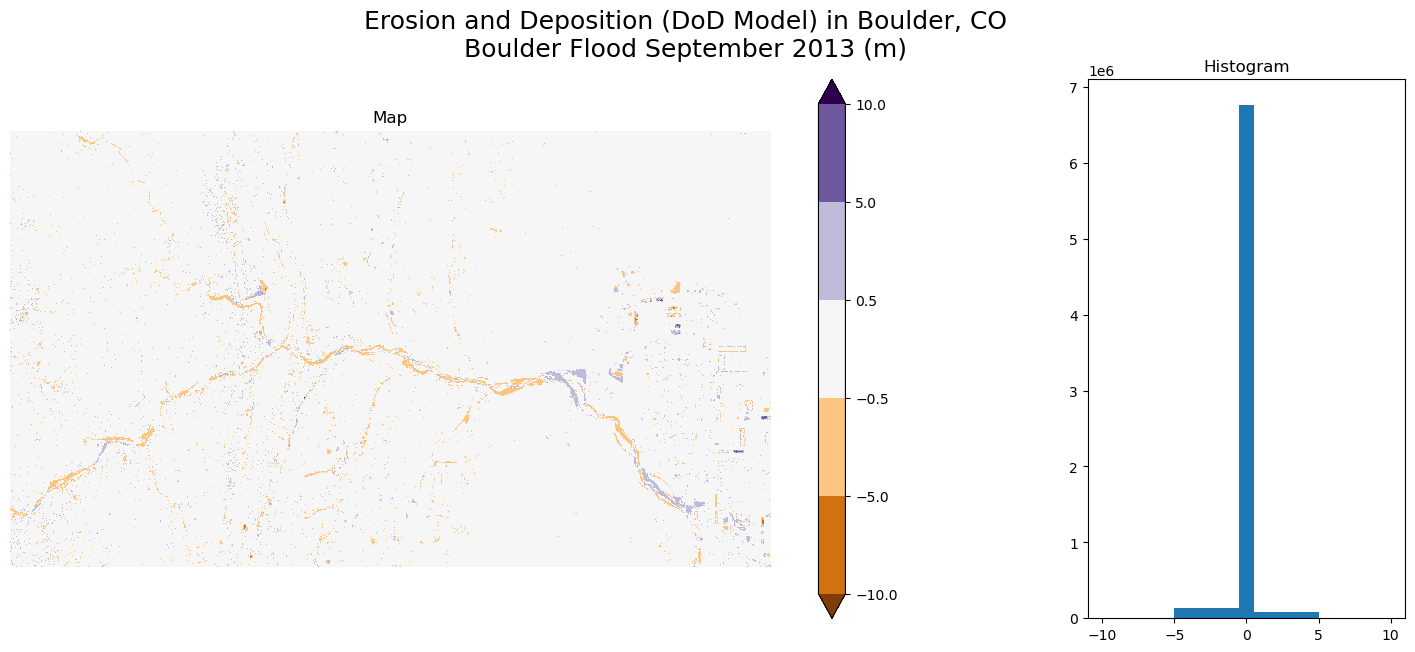

In [21]:
levels = [-10, -5, -.5, .5, 5, 10]

# plot model for erosion and deposition
plot_model(
    dod_arr, cmap='PuOr',
    levels=levels,
    title=('Erosion and Deposition (DoD Model) in Boulder, CO\n'
           'Boulder Flood September 2013 (m)'))

#### Interpret the DoD plot

In the cell below, write a one-sentence assertion-evidence style take away for the plot above, along with 2-3 sentences of explanation. How might you explain your results knowing that a flood took place?


### The Boulder Creek Channel was significantly eroded by the September 2013 flood

From the plot, we can see much more erosion than deposition, with the majority of areas outside of the creek having maybe less than 1 - .5 cm. This could indicate that these minor changes are noise in our data, which was also stated in the NEON technical memo. It also seems that the majority of deposition occurred along the curves of the Boulder Creek Channel.

### Plot the change in vegetation

Create a second plot for your dCHM data. It should be formatted the same as the previous plot. Try `levels=[-15, -5, -2, 2, 5, 15]` to start.

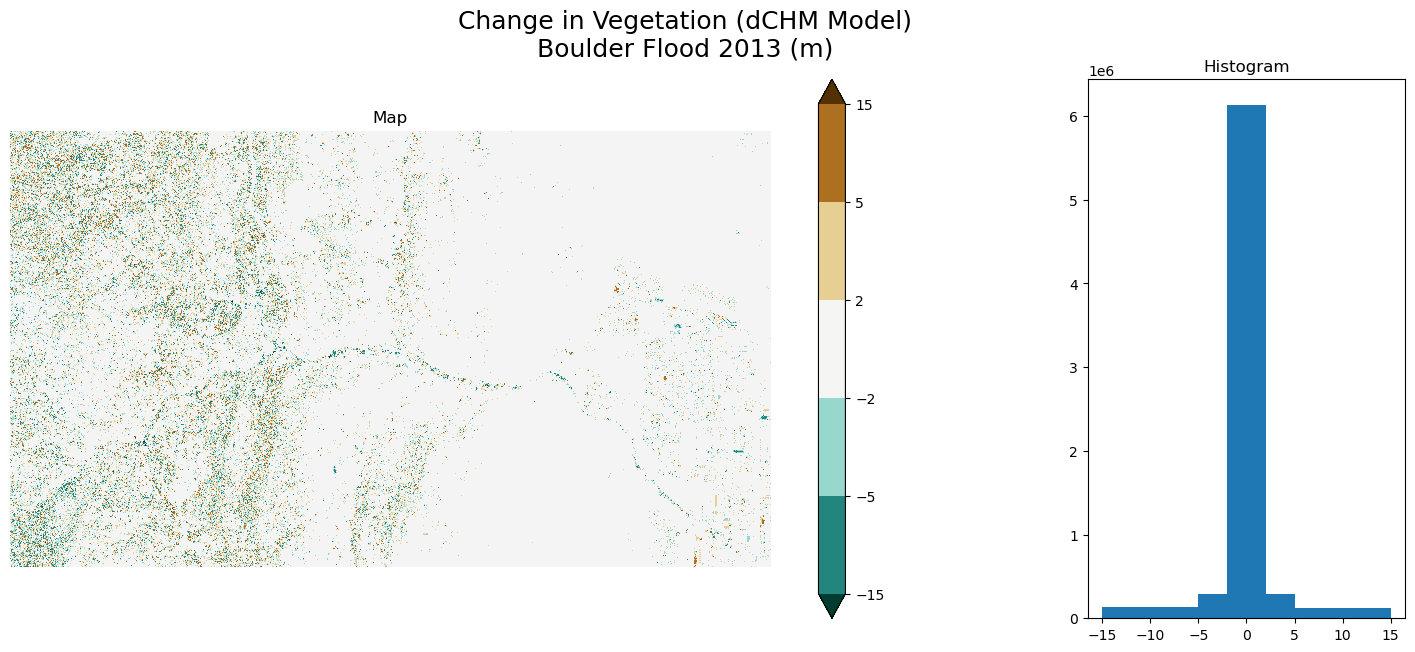

In [22]:
levels = [-15, -5, -2, 2, 5, 15]

# plot model for change in vegetation
plot_model(
    dchm_arr, cmap='BrBG_r',
    levels=levels,
    title='Change in Vegetation (dCHM Model)\nBoulder Flood 2013 (m)')

<img style="float: left;" src="colored-bar.png"/>

#### Interpret the dCHM plot

In the cell below, write a one-sentence assertion-evidence style take away for the plot above, along with 2-3 sentences of explanation. How might you explain your results knowing that a flood took place?



### Boulder had substantial differences in vegetation post-flood, especially in the Boulder Creek Channel.

From the plot, we can see the darkest areas are contained along the channel, indicating vegetation within and along the stream was likely destroyed. We can also see significant changes to vegetation in the western region of the map, potentially highlighting the areas where the water began flooding out of the stream and affecting nearby terrain. I would assume this is where elevation begins decreasing, and water starts escaping from the channel and affecting nearby vegetation.

<img style="float: left;" src="colored-bar.png"/>

## Pep 8, Spelling and Does the Notebook Run?
In this cell, we will give you points for the following

1. PEP 8 is followed throughout the notebook (4 points)
2. Spelling and grammar are considered in your written responses above (4 points)
3. The notebook runs from top to bottom without any editing (it is reproducible) - 4 points